## <font color=crimson>Welcome to my project 3 presentation:</font>

### <font color=lightseagreen>To test (some of) the hypotheses formed in mini-project 2 and on the basis of the collected data thereof via visualization</font>

### <font color=lightseagreen>Hypotheses/ Research questions covered:</font>

__1. Are there a best and a worst day of the months to invest in (buy stocks from) <font color=deeppink>the MSCI world index</font> and <font color=deeppink>S&P 500</font>?__

__2. If question one is likely to be true, do special events in time have an influencing effect on them:__
> Do the best and the worst day __move over the years__ or the trends __stay constant__? 
    > - __`financial crisis in 2008?`__
    > - __`corona crisis`__?

__3. Will blue-chip stocks like <font color=deeppink>Apple, Microsoft, Google, etc...</font> follow the same trend, wrt worst and best day for stock purchases?__

__4. As rumour has it, <font color=deeppink>May</font> and/or <font color=deeppink>October</font> might be the sour months for stock investment. Is this really true?__

__5. Are there any correlations between the various stock prices of the same company, i.e. _open, low, high, close, etc...___

### <font color=deeppink>Research question 1 and 3:</font>
> <font color=deeppink>Are there a best and a worst day of the months to invest in (buy stocks from) the MSCI world index and S&P 500?</font>

1. Best day == day when closing price is at its minimum
***
2. Worst day == day when closing price it at ist maxmium
***
3. Hypothesis is that __worst day__ happens on __the first day of the month__, while __best day__ around __the end of the month__.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import random
sns.set(font_scale = 1.3)
import re
from datetime import datetime
%matplotlib inline
# pd.options.display.float_format = '{:,.2f}'.format # to pre-format the display of the decimals in pandas dataframes
import openpyxl
from openpyxl.workbook import Workbook
from openpyxl import load_workbook
from openpyxl.utils.dataframe import dataframe_to_rows
import warnings
warnings.filterwarnings("ignore")

In [32]:
data = pd.read_excel('../data_folder/dataset2.xlsx')

In [39]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Holiday,Month,Year,Company_name,Day
0,2007-11-15,23.000000,28.450001,22.059999,26.100000,24.145756,11770500,MSCI,No,November,2007,MSCI index,15
1,2007-11-16,25.980000,25.980000,23.600000,24.959999,23.091114,1242900,MSCI,No,November,2007,MSCI index,16
2,2007-11-19,24.709999,25.750000,24.530001,25.750000,23.821960,469500,MSCI,No,November,2007,MSCI index,19
3,2007-11-20,25.420000,29.209999,25.260000,27.320000,25.274403,522200,MSCI,No,November,2007,MSCI index,20
4,2007-11-21,27.000000,27.129999,25.940001,26.650000,24.654570,167500,MSCI,No,November,2007,MSCI index,21


In [37]:
def get_day(cell):
    
    '''
    This function is to get the day of the month from a timestamp value
    input: pandas cell containting timestamp
    output: day (int) 
    
    '''
    
    d = datetime.strptime(str(cell), '%Y-%m-%d %X')
    d = d.strftime("%d")
    
    return int(d)

data['Day'] = data['Date'].apply(get_day)

In [34]:
def get_month(cell):
    
    '''
    This function is to get the name of the month from a timestamp value
    input: pandas cell containting timestamp
    output: month (str) 
    
    '''
    
    d = datetime.strptime(str(cell), '%Y-%m-%d %X')
    d = d.strftime("%B")
    
    return d

data['Month'] = data['Date'].apply(get_month)

In [35]:
def get_year(cell):
    
    '''
    This function is to get the year from a timestamp value
    input: pandas cell containting timestamp
    output: year (int) 
    
    '''
    
    d = datetime.strptime(str(cell), '%Y-%m-%d %X')
    d = d.strftime("%Y")
    
    return int(d)

data['Year'] = data['Date'].apply(get_year)

In [36]:
# add full companies' names to the dataset, to be used for graphs instead of the ticker symbols
company_names = {'MSCI': 'MSCI index',
                 '^GSPC': 'S&P 500 index',
                 'AAPL': 'Apple',
                 'MSFT': 'Microsoft',
                 'GOOG': 'Google'}

data['Company_name'] = data.Company.map(company_names)

In [45]:
def data_inspection(n, ticker):
    half_n = int(n/2)
    SP500_subset = data[data.Company=='^GSPC']
    date_list = SP500_subset.Date.tolist()
    lst = random.sample(date_list, n)
    lst.sort()
    mon_yr = list(zip(map(get_month, lst), map(get_year, lst)))
    zp = zip([0, 1], [mon_yr[:half_n], mon_yr[half_n:]])
    colors = list(sns.color_palette("tab10"))

    fig, axs = plt.subplots(2, half_n, figsize=(30, 10))
    for i, l in zp:
        for j in range(half_n): 
            month, year = l[j]
            mask = (SP500_subset.Month==month) & (SP500_subset.Year==year)
            extract = SP500_subset[mask]
            plt.sca(axs[i, j])
            sns.lineplot(data=extract, x='Day', y='Close', color=colors[i*5+j])
            xticks_loc = list(range(1, 32, 3))
            axs[i, j].xaxis.set_major_locator(mticker.FixedLocator(xticks_loc))
            axs[i, j].set_xticklabels(xticks_loc, rotation=45)
            axs[i, j].set_xlabel('Day of the month', labelpad=10)
            axs[i, j].set_ylabel('Closing price', labelpad=10)       
            axs[i, j].set_title(f'{month[:3]}-{year}')      
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.show()

### __Inspect the data randomly and visually__

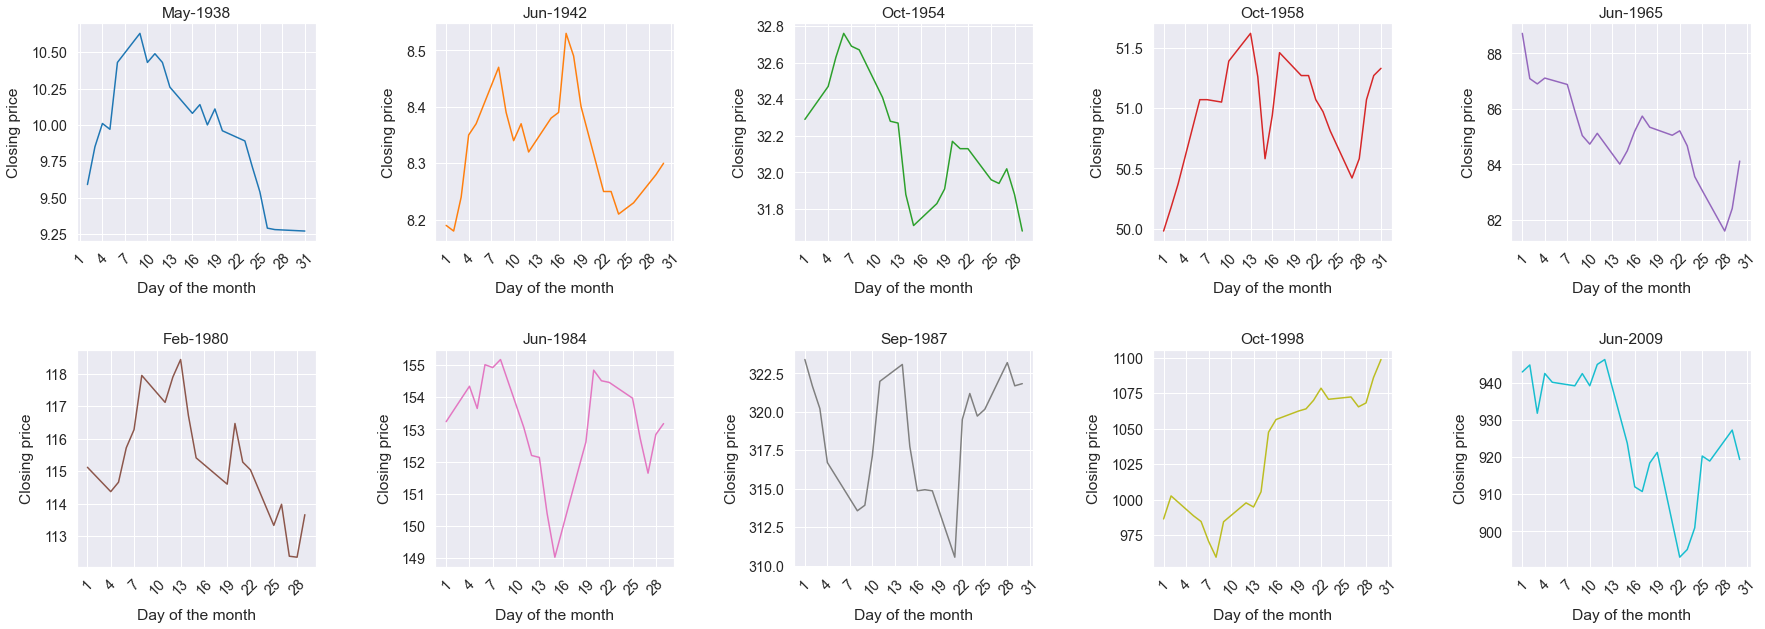

In [101]:
data_inspection(10, 'MSCI')

In [55]:
def get_subset(ticker):
    subset = data[data['Company']==ticker]
    subset_min = subset[['Year', 'Month', 'Close', 'Company_name']].groupby(['Company_name', 'Year', 'Month']).min().reset_index()
    subset_max = subset[['Year', 'Month', 'Close', 'Company_name']].groupby(['Company_name', 'Year', 'Month']).max().reset_index()
    def func(row):
        cond1 = data.Year==row.Year
        cond2 = data.Month==row.Month
        cond3 = data.Close==row.Close
        return data.loc[cond1 & cond2 & cond3].Day.values[0]

    subset_min['Day'] = subset_min.apply(func, axis=1)
    subset_max['Day'] = subset_max.apply(func, axis=1)
    return subset_min, subset_max

In [57]:
def min_max(tickers):
    for ticker in tickers:
        subset_min, subset_max = get_subset(ticker)
        subsets = [subset_min, subset_max]
        fig, axs = plt.subplots(1, 2, figsize=(22, 6), sharey=True)
        titles = ['lowest', 'highest']          # to be used as a part of titles
        for i, subset in enumerate(subsets):
            plt.sca(axs[i])
            sns.countplot(x=subset.Day, data=subset)
            axs[i].set_title(f'{subset.Company_name.unique()[0]} at its {titles[i]}', fontsize=18)
            axs[i].set_ylabel('Total number of occurences', labelpad=10, fontsize=18)
            axs[i].set_xlabel('Day of the month', labelpad=10, fontsize=18)
        plt.subplots_adjust(wspace=0.1, hspace=0.7)
        plt.show()    

### <font color=deeppink>Can we accept or reject the hypothesis via visualization?</font>

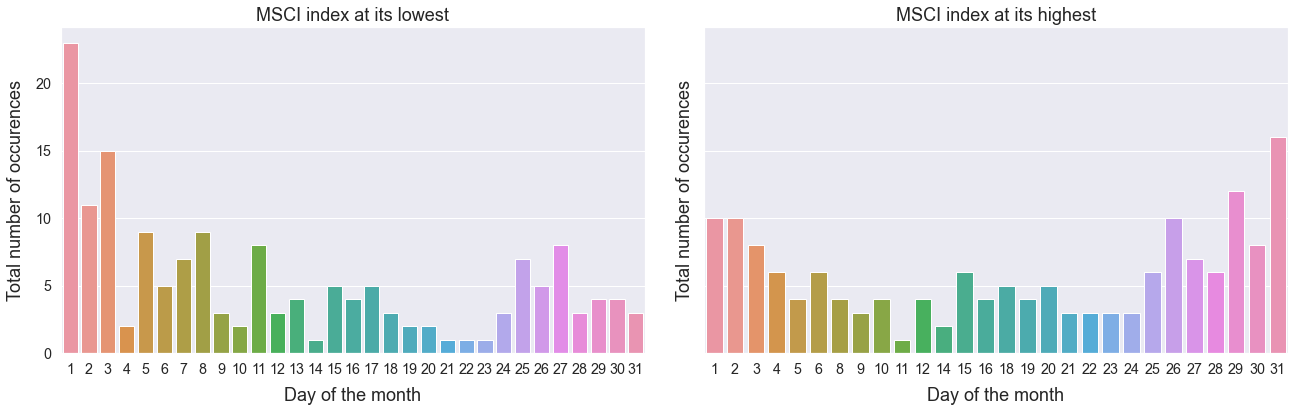

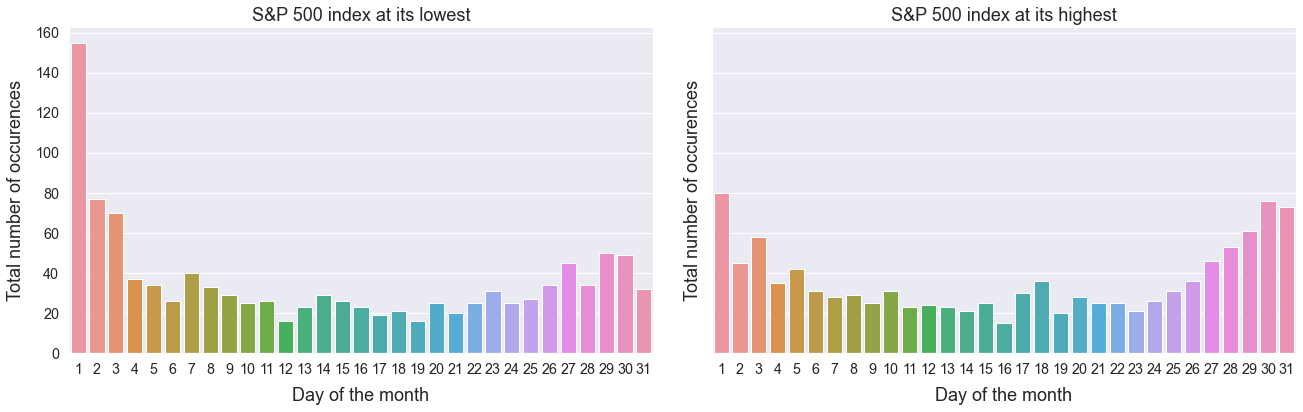

In [59]:
tickers = ['MSCI', '^GSPC']
min_max(tickers)

### <font color=deeppink>Making the link to the research question: Do the blue-chip stocks following the same trend?</font>

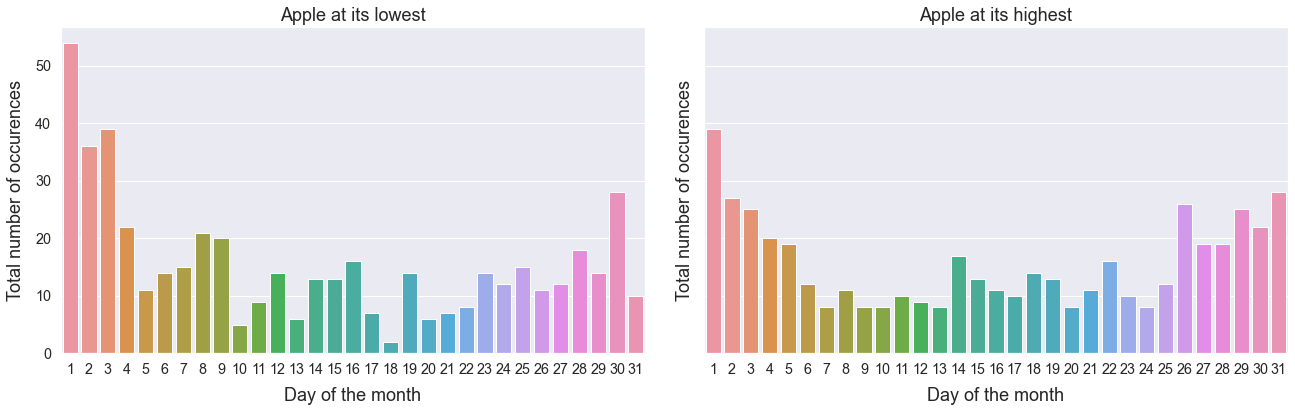

In [106]:
tickers = ['AAPL'] 
min_max(tickers)

### Conclusion for question 1 and 3:

1. It appears:
     1. It is likely that the lowest closing price happens more often on the first couples of days of the month
     2. However, that does __NOT__ make it __definitely__ more profitable to invest then, since it can be seen that the highest closing price also happens quite frequently on these days as well
     3. The same observation is true the other way around
     4. Observation is the same also for the blue-chip stocks.
***
2. It is all about chances.
***
3. The hypothesis simply cannot be fully accepted or rejected via visualization. Deeper backend analysis is needed.
***
4. Another factor that should be taken into account as well: __`volatility`__

### <font color=deeppink>Research question 2:</font>

> <font color=deeppink>Did special event in time have an impact on this observed trend?</font>

In [122]:
def event_check(year_mark, tickers):
    for ticker in tickers:
        subset_min, subset_max = get_subset(ticker)
        subsets = [subset_min[subset_min.Year>=year_mark], subset_max[subset_max.Year>=year_mark]]
        fig, axs = plt.subplots(1, 2, figsize=(22, 6))
        titles = ['lowest', 'highest']          # to be used as a part of titles
        for i, subset in enumerate(subsets):
            plt.sca(axs[i])
            sns.countplot(x=subset.Day, data=subset, color='darkmagenta')
            axs[i].set_title(f'{subset.Company_name.unique()[0]} at its {titles[i]}', fontsize=18)
            axs[i].set_ylabel('Total number of occurences', labelpad=10, fontsize=18)
            axs[i].set_xlabel('Day of the month', labelpad=10, fontsize=18)
        plt.subplots_adjust(wspace=0.2, hspace=0.3)
        plt.show()  

### __Whole dataset:__

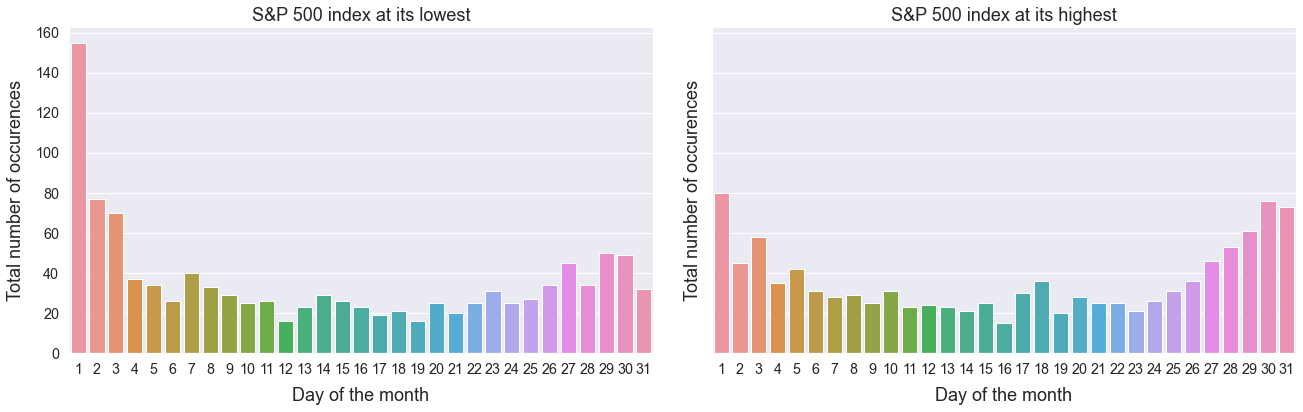

In [118]:
tickers=['^GSPC']
min_max(tickers)

### __After the event:__

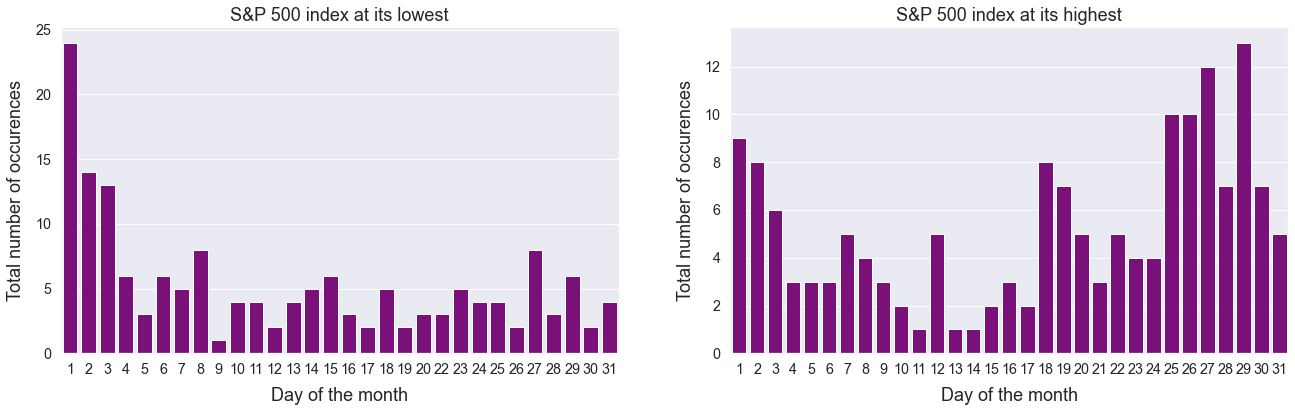

In [123]:
event_check(2008, tickers)

In [68]:
def split_months(ticker, mn, mx):
    import calendar
    month_list = list(calendar.month_name)
    month_list.pop(0)
    month_list_cut = list(map(lambda x: x[:3], month_list))

    ss_min = get_subset(ticker)[0]

    flter1 = ss_min.Day.isin(list(range(mn, mx)))
#     flter2 = ss_min.Day.isin(list(range(11, 21)))
#     flter3 = ss_min.Day.isin(list(range(21, 32)))
    split_sets = [ss_min[flter1]]
    for st in split_sets:
        fig, axs = plt.subplots(1, 1, figsize=(16, 8))
        sns.countplot(x='Day', data=st, hue='Month', palette='hls', hue_order=month_list)
        yticks = axs.get_yticks()    # this is a list of y-tick values
        new_yticks = list(range(int(min(yticks)), int(max(yticks))+2, 2))
        axs.set_yticks(new_yticks)
        axs.set_xlabel('Day of the month', labelpad=10)
        axs.set_ylabel('Total number of occurences', labelpad=10, fontsize=18)
        plt.legend(loc='upper right', bbox_to_anchor=[1.16, 1], fontsize=13)

    plt.show()

### <font color=deeppink>Best day in each month to buy stock?</font>

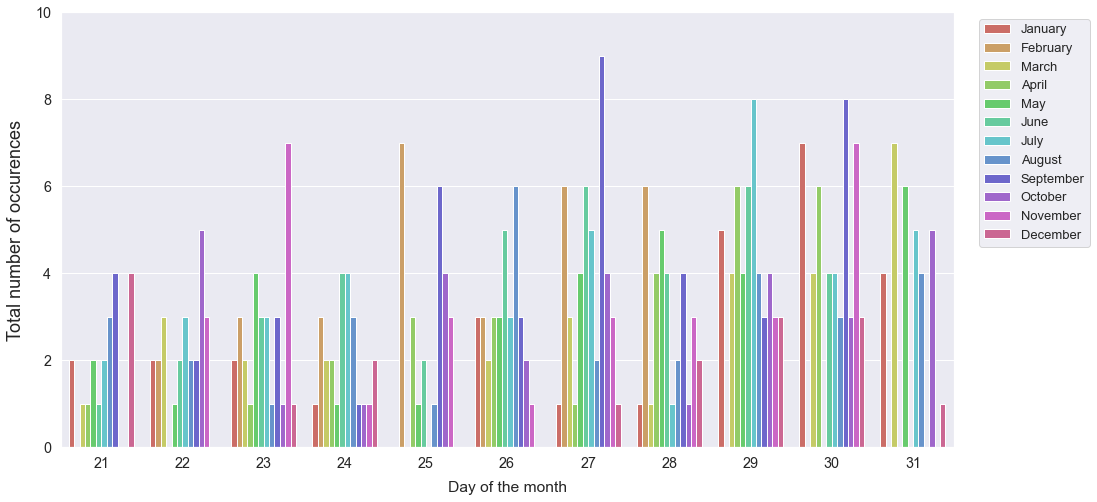

In [104]:
ticker, mn, mx = '^GSPC', 21, 32
split_months(ticker, mn, mx)

### <font color=deeppink>Research question 4:</font>

> <font color=deeppink>As rumour has it, May and/or October might be the sour months for stock investment. Is this really true?</font>

In [71]:
from IPython.display import Image

### <font color=deeppink>Introducing volatility</font>

1. Calculating Stock Returns:
    1. Determine a period in which to measure returns -> in my case I chose `per month`, thus n~21 days
    2. Calculate returns
2. Volatility is similar to standard deviation on the calculated return
***
[Link to volatility concept](https://www.wikihow.com/Calculate-Historical-Stock-Volatility)


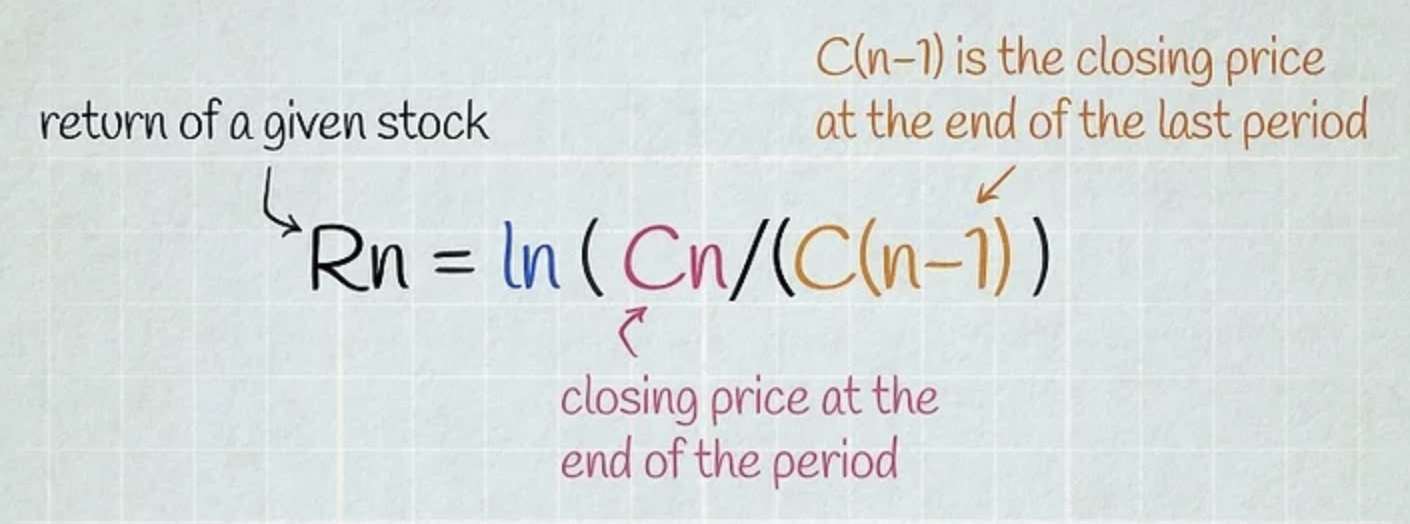

In [77]:
Image('../data_folder/calculate_return.png') 

### What I did:
1. Calculated returns, relative volatility and abs relative volatility for every month of every year
***
2. Calculated the average relative volatility and average abs relative volatility for every month of all the years combined.
***
3. Produced 2 types of graph:
    1. Graph for inspection of both parameters and returns on a yearly basis `(based on 1.)`
    2. One overall graph of the two parameters of all the years combined `(based on 2.)`

In [78]:
def mean_returns(col):
    lst = col.tolist()
    returns = [j-i for i, j in zip(lst[:-1], lst[1:])]
    mean_returns = np.mean(returns)
    return mean_returns

def volatility(col):
    lst = col.tolist()
    returns = [j-i for i, j in zip(lst[:-1], lst[1:])]
    mean_returns = np.mean(returns)
    volatility = np.std(returns)
    return volatility

def rel_volatility(col):
    lst = col.tolist()
    returns = [j-i for i, j in zip(lst[:-1], lst[1:])]
    mean_returns = np.mean(returns)
    volatility = np.std(returns)
    rel_volatility = volatility/mean_returns*100
    return rel_volatility

In [87]:
import calendar
month_list = list(calendar.month_name)
month_list.pop(0)
month_list_cut = list(map(lambda x: x[:3], month_list))

In [81]:
def func1(ticker, min_year, max_year):
    year_list = list(range(min_year, max_year))

    another_subset = data[data['Company']==ticker]
    another_subset = another_subset.pivot_table(index=['Year', 'Month', 'Company_name'], values=['Close'],
                                                aggfunc=[mean_returns, volatility, rel_volatility])
    another_subset.reset_index(inplace=True)
    new_col = ['Year', 'Month', 'Company_name', 'mean_returns', 'volatility', 'rel_volatility']
    another_subset.columns = new_col

    another_subset['abs_rel_vol'] = np.abs(another_subset['rel_volatility'])

    indx_list = list(another_subset[another_subset.mean_returns==0].index)
    another_subset.drop(index=indx_list, inplace=True)

    sequence = dict(zip(month_list, range(12)))
    another_subset['Sequence'] = another_subset['Month'].map(sequence)

    df = another_subset.pivot_table(index=['Year', 'Month', 'Sequence'], values=['rel_volatility', 'abs_rel_vol'])
    df.sort_values(['Year', 'Sequence'], inplace=True)
    df.reset_index(inplace=True)

    df_filtered = df[df.Year.isin(year_list)]

    fig, axs = plt.subplots(1, 1, figsize=(15, 6))
    sns.lineplot(x='Month', y='rel_volatility', hue='Year', style='Year', data=df_filtered, palette='tab10', markers=True, markersize=10)
    axs.set_ylabel('Relative Volatility of Monthly Returns (%)', labelpad=13)
    axs.set_xlabel(axs.get_xlabel(), labelpad=13)
    axs.set_xticklabels(month_list_cut)
    plt.legend(loc='upper right', bbox_to_anchor=[1.12, 1], fontsize=15)
    plt.show()

### Volatility

#### Inspection per year:

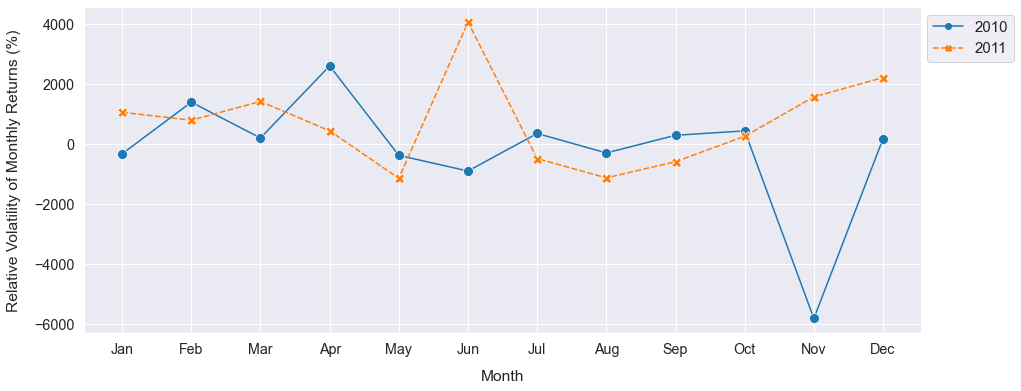

In [105]:
ticker, min_year, max_year = '^GSPC', 2010, 2012
func1(ticker, min_year, max_year)

#### Monthly average of all years combined:

In [97]:
def func4(ticker, params):
    another_subset = data[data['Company']==ticker]
    another_subset = another_subset.pivot_table(index=['Year', 'Month', 'Company_name'], values=['Close'],
                                                aggfunc=[mean_returns, volatility, rel_volatility])
    another_subset.reset_index(inplace=True)
    new_col = ['Year', 'Month', 'Company_name', 'mean_returns', 'volatility', 'rel_volatility']
    another_subset.columns = new_col

    another_subset['abs_rel_vol'] = np.abs(another_subset['rel_volatility'])
    indx_list = list(another_subset[another_subset.mean_returns==0].index)
    another_subset.drop(index=indx_list, inplace=True)

    sequence = dict(zip(month_list, range(12)))
    another_subset['Sequence'] = another_subset['Month'].map(sequence)
    df1 = another_subset.pivot_table(index=['Month', 'Sequence'], values=params)
    df1.sort_values('Sequence', inplace=True)
    df1.reset_index(inplace=True)

    fig, axs = plt.subplots(1, 1, figsize=(15, 6))
    plt.sca(axs)
    axs.plot(df1.Month, df1.rel_volatility, 'g-d', df1.Month, df1.abs_rel_vol, 'r:*', markersize=11)
    axs.set_xticks(list(range(12)))
    axs.set_ylabel('Relative Volatility of Monthly Returns (%)', labelpad=13)
    axs.set_xlabel('Month', labelpad=13)
    axs.set_xlabel(axs.get_xlabel(), labelpad=13)
    axs.set_xticklabels(month_list_cut)
    plt.legend(['Relative volatility', 'Abs relative volatility'])
    plt.show()

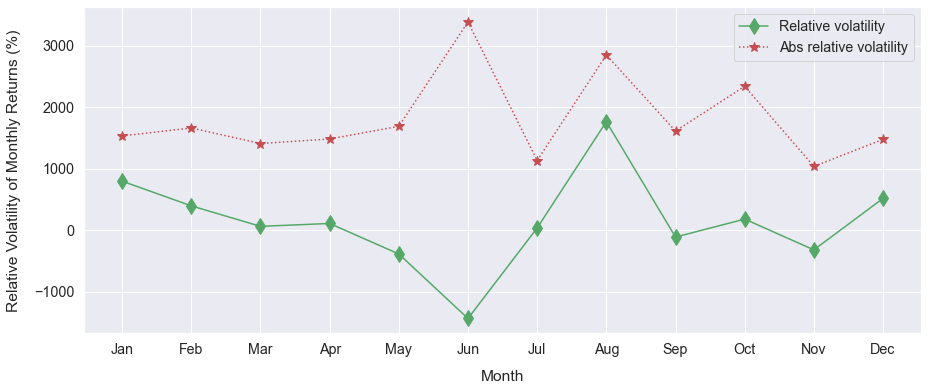

In [98]:
ticker, params = '^GSPC', ['rel_volatility', 'abs_rel_vol']
func4(ticker, params)

### Returns

In [111]:
def returns(col):
    lst = col.tolist()
    returns = [j-i for i, j in zip(lst[:-1], lst[1:])]
    return returns

def func2 (ticker, year):
    s_set = data[data['Company']==ticker]
    s_set = s_set.pivot_table(index=['Year', 'Month', 'Company_name'], values=['Close'], aggfunc=[returns])
    s_set.reset_index(inplace=True)
    new_col = ['Year', 'Month', 'Company_name', 'Returns']
    s_set.columns = new_col
    s_set = s_set.explode('Returns')
    s_set_filtered = s_set[s_set.Year==year]

    fig, axs = plt.subplots(1, 1, figsize=(16, 8))
    sns.boxplot(y='Returns', x='Month', data=s_set_filtered, color='cyan')
    axs.set_xlabel(axs.get_xlabel(), labelpad=13, fontsize=18)
    axs.set_ylabel(axs.get_ylabel(), labelpad=13, fontsize=18)
    axs.set_xticklabels(month_list_cut)
    plt.title(f'Variation of monthly returns of {s_set_filtered.Company_name.unique()[0]} in {year}', fontsize=20)
    plt.show()

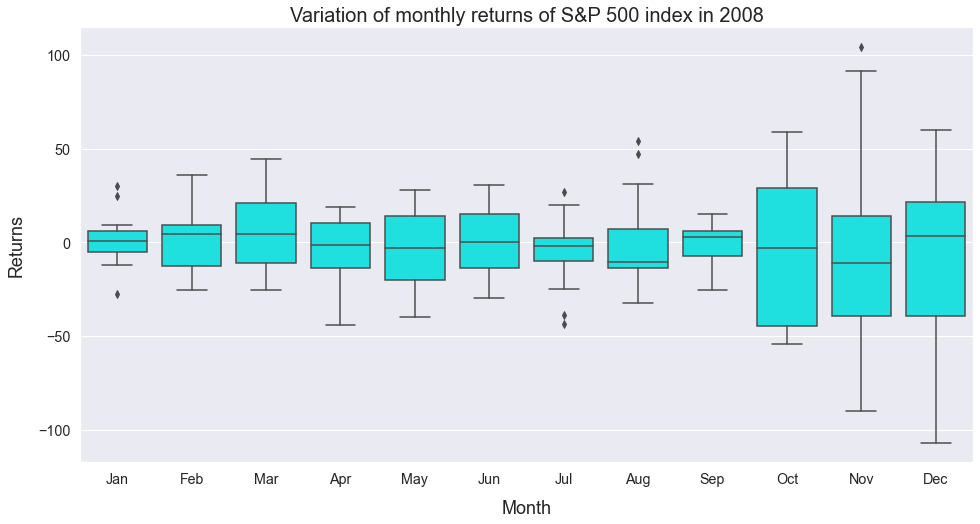

In [112]:
ticker, year = '^GSPC', 2008 
func2(ticker, year)

### <font color=deeppink>Research question 5:</font>

> <font color=deeppink>Are there any correlations between the various stock prices of the same company, i.e. _open, low, high, close, etc...</font>

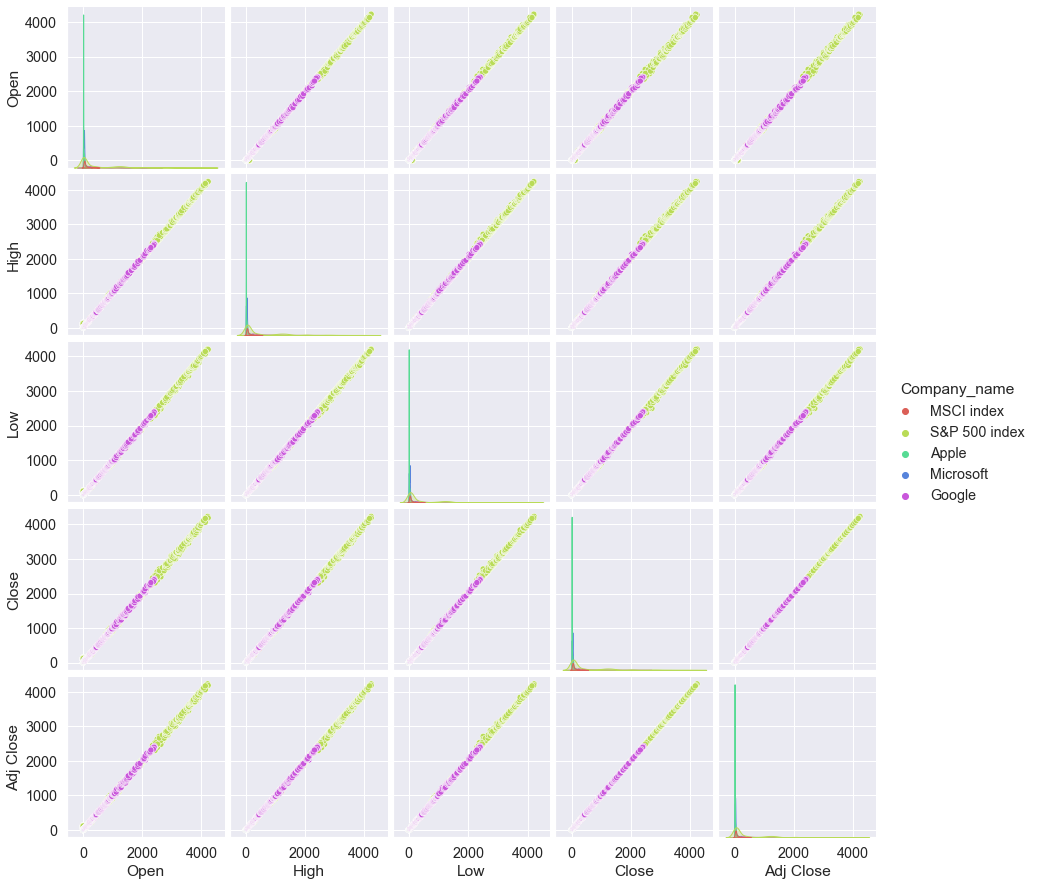

In [99]:
s_set1 = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Company_name']]
sns.pairplot(data=s_set1, hue='Company_name', palette='hls')
plt.show()

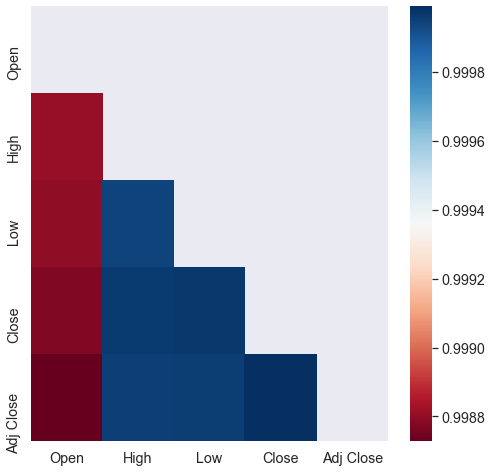

In [100]:
corr = s_set1.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
fig, axs = plt.subplots(1, 1, figsize=(8, 8))
sns.heatmap(data=corr, cmap="RdBu", mask=mask)
plt.show()

### <font color=deeppink>Challenges:</font>

__1. Finding suitable type of graph for hypothesis testing__
***
__2. Data wrangling, cleaning into the suitable format --> `This took up the majority of the time`__
***
__3. Working with datetime and the difficulties therewith in creating graphs__
***
__4. Time__

### <font color=deeppink>Learnings:</font>

__1. Learned a lot about detailed features of seaborn__
***
__2. Always double check the processed data to be sure that it is correct --> `example is situation with groupby method in connection with testing the first research question`
***
__3. Sorted x-axis ticks/labels appear to affect the automatic generation of ci 